In [ ]:
#!pip install pandas-profiling
#!pip3 install -U matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploades = files.upload()

Saving datatest2.txt to datatest2.txt


In [ ]:
df1 = pd.read_csv('datatest2.txt',header=0,sep=',')
df1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
df2 = pd.read_csv('datatraining.txt',header=0,sep=',')
df2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
df3 = pd.read_csv('datatest.txt',header=0,sep=',')
df3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
df = pd.concat([df1, df2,df3], axis=0)
df.shape

(20560, 7)

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
462,21.200000,23.700000,0.0,561.400000,0.003685,0
861,21.033333,23.666667,419.0,602.333333,0.003643,1
190,21.600000,26.290000,0.0,503.500000,0.004193,0
6851,20.675000,25.575000,393.0,885.800000,0.003852,1
2672,20.945000,25.390000,444.0,697.333333,0.003888,1


<Axes: >

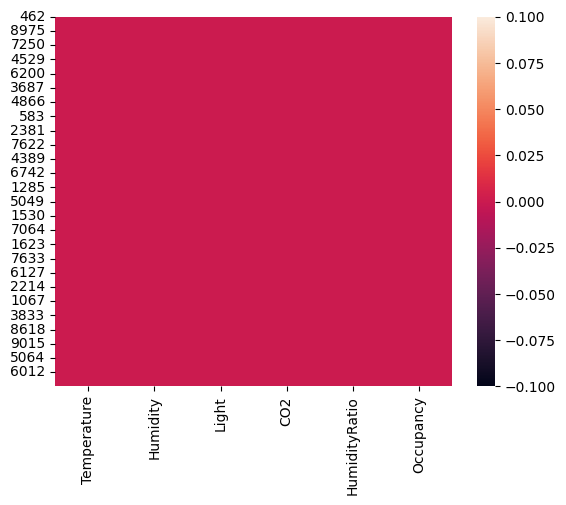

In [ ]:
#check null value
sns.heatmap(df.isnull())

In [ ]:
df.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [ ]:
df.to_csv('Occupancy_preprocessed.csv', encoding='utf-8', index=False)

In [ ]:
X = df.drop(['Occupancy'],axis=1)
y = df['Occupancy']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state=42)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=10)

In [ ]:
param_grid = [{'n_estimators': range(50, 150, 10), 'max_depth' : range(1,10,1), }]

In [ ]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [ ]:
param_grid = [{'n_estimators': [50], 'max_depth' : [9], 'min_samples_leaf' : range(1,10,1),'min_samples_split': range(2,10,1),}]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
param_grid = [{'n_estimators': [50], 'max_depth' : [9], 'min_samples_leaf' : [2],'min_samples_split': [4],
               'max_features': ['sqrt','log2','None'],'bootstrap': [True,False],
               }]
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True, n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
grid_search.best_score_

0.9922526111659977

In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=50)

In [ ]:
pred_y = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report,f1_score, recall_score, confusion_matrix
accuracy = accuracy_score(y_test, pred_y)
print(accuracy)
recall = recall_score(y_test, pred_y,average='macro')
print(recall)
precision = precision_score(y_test, pred_y,average='macro')
print(precision)
f1 = f1_score(y_test, pred_y,average='macro')
print(f1)
print('Classification report for Random forest Model:\n',classification_report(y_test, pred_y))

0.9909208819714657
0.9897864232541652
0.9852092127059378
0.9874727482369408
Classification report for Random forest Model:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4712
           1       0.97      0.99      0.98      1456

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [ ]:
print(confusion_matrix(y_test, pred_y))

[[4674   38]
 [  18 1438]]
